In [1]:
# Import needed packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the files. Specifile file path since the .data are in a subfolder.
df1 = pd.read_csv('MysteryData/Mystery1.data', header=None)
print("----\n\ndf1\n")
print(df1.head())

# Repeat for the other files
df2 = pd.read_csv('MysteryData/Mystery2.data', header=None)
print("----\n\ndf2\n")
print(df2.head())
df3 = pd.read_csv('MysteryData/Mystery3.data', header=None)
print("----\n\ndf3\n")
print(df3.head())
df4 = pd.read_csv('MysteryData/Mystery4.data', header=None)
print("----\n\ndf4\n")
print(df4.head())
df5 = pd.read_csv('MysteryData/Mystery5.data', header=None)
print("----\n\ndf5\n")
print(df5.head())

----

df1

   0    1    2    3    4    5    6    7    8    9    ...  490  491  492  493  \
0    1    1    1    1    1    1    1    1    1    1  ...    1    1    1    1   
1    1    1    1    1    1    1    1    1    1    1  ...    1    1    1    1   
2    1    1    1    1    1    1    1    1    1    1  ...    1    1    1    1   
3    1    1    1    1    1    1    1    1    1    1  ...    1    1    1    1   
4    1    1    1    1    1    1    1    1    1    1  ...    1    1    1    1   

   494  495  496  497  498  499  
0    1    1    1    1    1    1  
1    1    1    1    1    1    1  
2    1    1    1    1    1    1  
3    1    1    1    1    1    1  
4    1    1    1    1    1    1  

[5 rows x 500 columns]
----

df2

   0    1    2    3    4    5    6    7    8    9    ...  592  593  594  595  \
0  250  250    3    3    3    3    3    3    3    3  ...    3    3    3    3   
1  250  250    3    3    3    3    3    3    3    3  ...    3    3    3    3   
2  250  250    3    3    3   

In [2]:
print("----\n\ndf1\n")
df1.info()

print("----\n\ndf2\n")
df2.info()

print("----\n\ndf3\n")
df3.info()

print("----\n\ndf4\n")
df4.info()

print("----\n\ndf5\n")
df5.info()

----

df1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 500 entries, 0 to 499
dtypes: int64(500)
memory usage: 1.9 MB
----

df2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762 entries, 0 to 761
Columns: 602 entries, 0 to 601
dtypes: int64(602)
memory usage: 3.5 MB
----

df3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Columns: 1156 entries, 0 to 1155
dtypes: int64(1156)
memory usage: 13.0 MB
----

df4

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 500 entries, 0 to 499
dtypes: int64(500)
memory usage: 1.9 MB
----

df5

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 501 entries, 0 to 500
dtypes: int64(501)
memory usage: 1.9 MB


After further exploration, the five files share similar properties, but should not be combines
# The great reveal about the mystery data
The professor revealed that the five files are one picture each.
In each picture, a value represents a pixel and a RGB color code.
Our goal is to transform the .data files into picturees, and fine-tune the color.

## Attemp 1: ask Chat GPT and try the method provided

### Key Points
* Normalization:
    * This ensures that the pixel values are in the correct range for a grayscale image (0–255).
* Grayscale Image Mode: 
    * The 'L' mode tells Pillow that you're creating a grayscale image.

# Picture 2

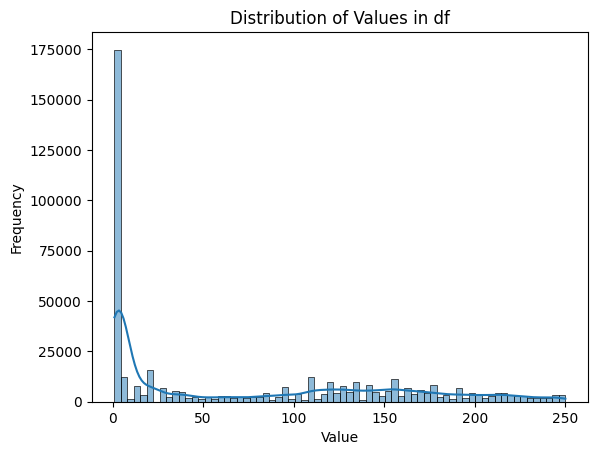

In [3]:
# Pic 2

df = df2

# Flatten the DataFrame to 1D if it's multi-dimensional (to avoid complications)
df_flat = df2.values.flatten()

# Plot histogram using seaborn
sns.histplot(df_flat, bins=70, kde=True)  # kde=True adds a smooth curve
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Values in df')
plt.show()

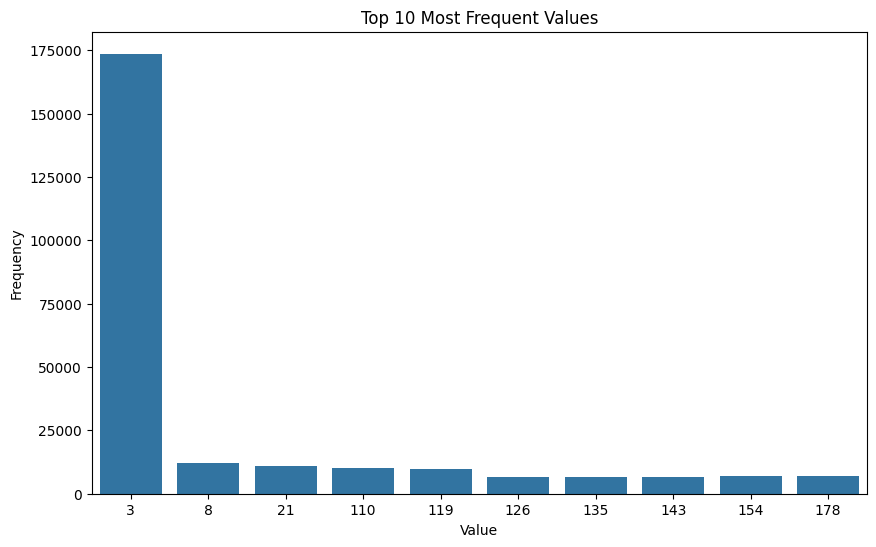

In [4]:
# pic 2 - show top 10 most frequent value
# Count the frequency of each unique value
value_counts = pd.Series(df_flat).value_counts()

# Select the top 10 most frequent values (you can adjust the number)
top_values = value_counts.head(10)

# Plot the top 10 most frequent values
plt.figure(figsize=(10, 6))
sns.barplot(x=top_values.index, y=top_values.values)
plt.title('Top 10 Most Frequent Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


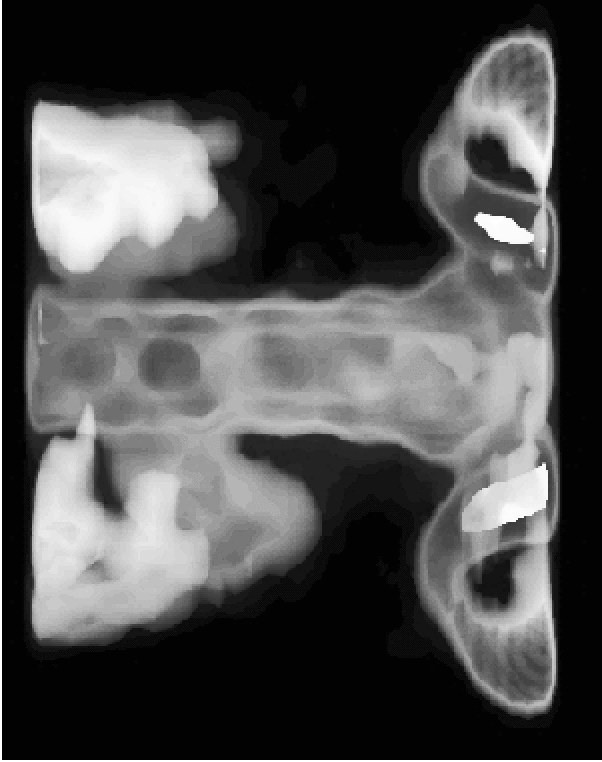

In [5]:
# pic 2

import numpy as np
from PIL import Image

# Step 1: Load the .data file with comma as the delimiter
data = np.loadtxt('MysteryData/Mystery2.data', delimiter=',')  # Specify the delimiter

# Step 2: Normalize data to ensure values fall within the 0-255 range for grayscale
min_val = df_flat.min()
max_val = df_flat.max()

# Normalize data to 0-255
normalized_data = (data - min_val) / (max_val - min_val) * 255


# Step 3: Convert to an image
image = Image.fromarray(np.uint8(normalized_data), 'L')  # 'L' mode for grayscale image

# Step 4: Save as PNG or JPG
image.save('output_image2.png')
display(image)

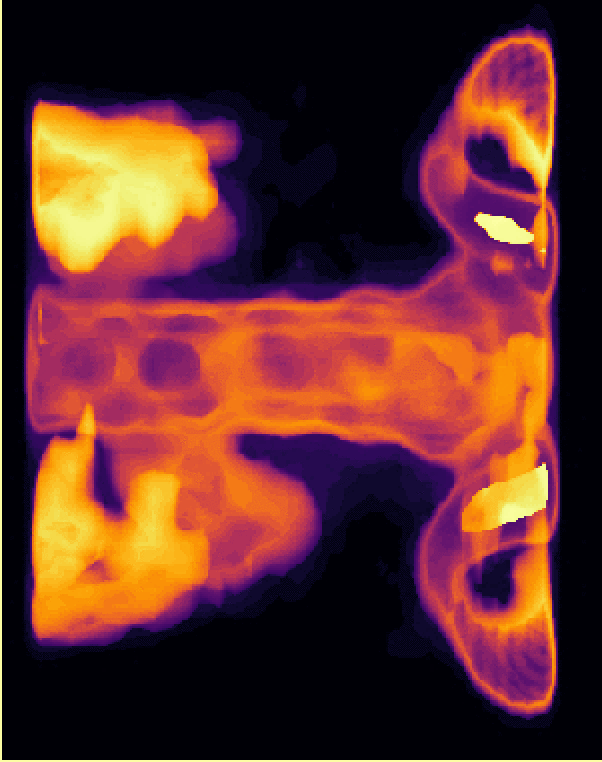

In [6]:
# add color
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Step 1: Load your normalized data (already normalized from 0 to 255)

# Step 2: Apply a colormap using matplotlib
colormap = plt.get_cmap('inferno')  # You can try other colormaps like 'plasma', 'inferno', 'jet', etc.
colored_data = colormap(normalized_data / 255.0)  # Normalizing to [0, 1] for colormap

# Step 3: Convert to an RGB image (ignore the alpha channel returned by the colormap)
rgb_data = (colored_data[:, :, :3] * 255).astype(np.uint8)  # Remove alpha channel and convert to 0-255 range

# Step 4: Convert to a PIL image and save
image = Image.fromarray(rgb_data)
image.save('output2_color1.png')
display(image)

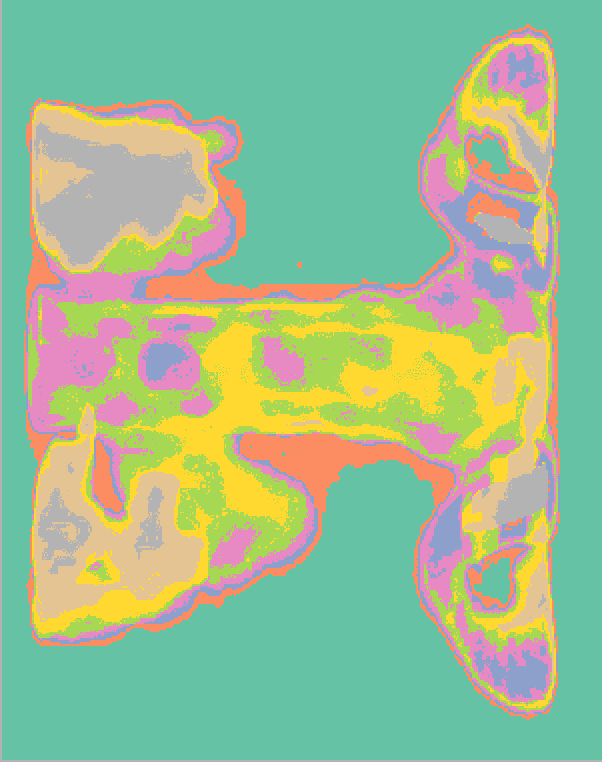

In [7]:
# add color
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Step 1: Load your normalized data (already normalized from 0 to 255)

# Step 2: Apply a colormap using matplotlib
colormap = plt.get_cmap('Set2')  # You can try other colormaps like 'plasma', 'inferno', 'jet', etc.
colored_data = colormap(normalized_data / 255.0)  # Normalizing to [0, 1] for colormap

# Step 3: Convert to an RGB image (ignore the alpha channel returned by the colormap)
rgb_data = (colored_data[:, :, :3] * 255).astype(np.uint8)  # Remove alpha channel and convert to 0-255 range

# Step 4: Convert to a PIL image and save
image = Image.fromarray(rgb_data)
image.save('output2_color2.png')
display(image)

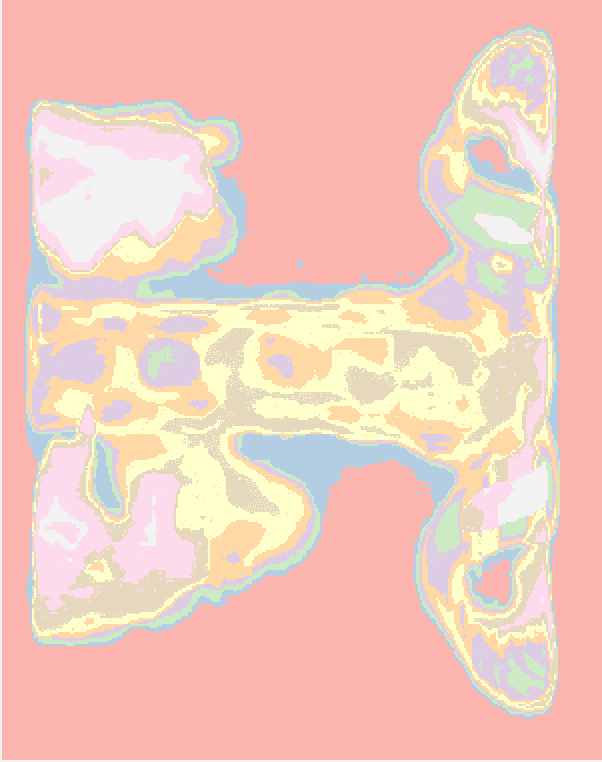

In [8]:
# add color
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Step 1: Load your normalized data (already normalized from 0 to 255)

# Step 2: Apply a colormap using matplotlib
colormap = plt.get_cmap('Pastel1')  # You can try other colormaps like 'plasma', 'inferno', 'jet', etc.
colored_data = colormap(normalized_data / 255.0)  # Normalizing to [0, 1] for colormap

# Step 3: Convert to an RGB image (ignore the alpha channel returned by the colormap)
rgb_data = (colored_data[:, :, :3] * 255).astype(np.uint8)  # Remove alpha channel and convert to 0-255 range

# Step 4: Convert to a PIL image and save
image = Image.fromarray(rgb_data)
image.save('output2_color3.png')
display(image)

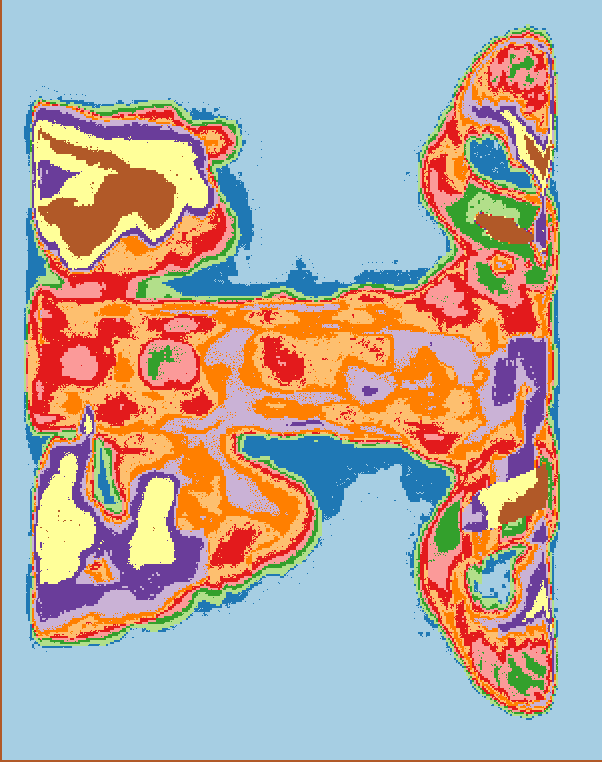

In [9]:
# add color
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Step 1: Load your normalized data (already normalized from 0 to 255)

# Step 2: Apply a colormap using matplotlib
colormap = plt.get_cmap('Paired')  # You can try other colormaps like 'plasma', 'inferno', 'jet', etc.
colored_data = colormap(normalized_data / 255.0)  # Normalizing to [0, 1] for colormap

# Step 3: Convert to an RGB image (ignore the alpha channel returned by the colormap)
rgb_data = (colored_data[:, :, :3] * 255).astype(np.uint8)  # Remove alpha channel and convert to 0-255 range

# Step 4: Convert to a PIL image and save
image = Image.fromarray(rgb_data)
image.save('output2_color4.png')
display(image)